In [11]:
from cmdstanpy import CmdStanModel
import arviz as az
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [26]:
#Translates a string in a form of yyyy-mm to a date
def translate_date(string: str):
    date = string.split("-")
    return datetime.date(int(date[0]), int(date[1]), 1)

def translate_all(dataframe):
    for i in range(len(dataframe)):
        dataframe.loc[i, "TIME"] = translate_date(dataframe.loc[i, "TIME"])
    return dataframe

def truncate_dates(inflation_df, unemployment_df):
    inflation_date_start = inflation_df["TIME"][:1].values[0]
    unemployment_date_start = unemployment_df["TIME"][:1].values[0]
    inflation_date_end = inflation_df["TIME"][-1:].values[0]
    unemployment_date_end = unemployment_df["TIME"][-1:].values[0]

    # print("inflation dates: " + str(inflation_date_start) + " - " + str(inflation_date_end))
    # print("unemployment dates: " + str(unemployment_date_start) + " - " + str(unemployment_date_end))


    if inflation_date_start > unemployment_date_start:
        unemployment_df = unemployment_df.loc[unemployment_df["TIME"] >= inflation_date_start]
    else:
        inflation_df = inflation_df.loc[inflation_df["TIME"] >= unemployment_date_start]
    
    if inflation_date_end < unemployment_date_end:
        unemployment_df = unemployment_df.loc[unemployment_df["TIME"] <= inflation_date_end]
    else:
        inflation_df = inflation_df.loc[inflation_df["TIME"] <= unemployment_date_end]

    return [inflation_df, unemployment_df]



inflation = pd.read_csv("inflacja.csv")
inflation = translate_all(inflation)

unemployment = pd.read_csv("unemployment.csv")
unemployment = translate_all(unemployment)

In [29]:
locations = ["POL", "HUN", "CZE", "DEU", "ESP", "FRA", "USA", "CAN", "CHL", "JPN"]
infl_list = []
unemp_list = []

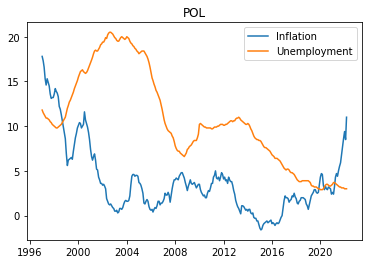

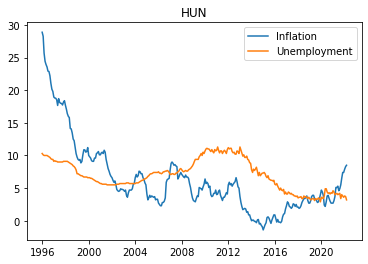

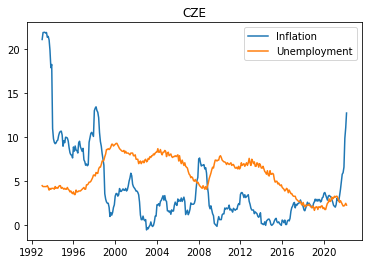

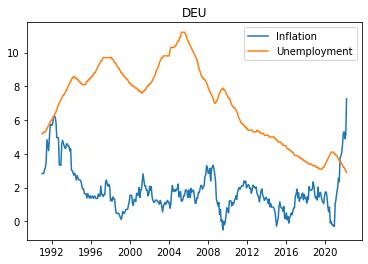

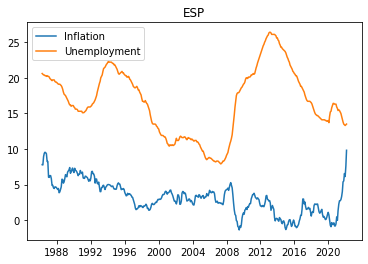

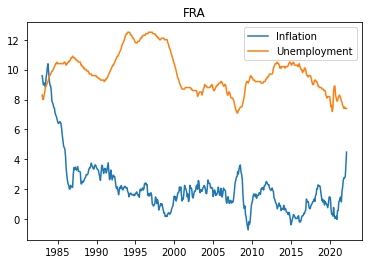

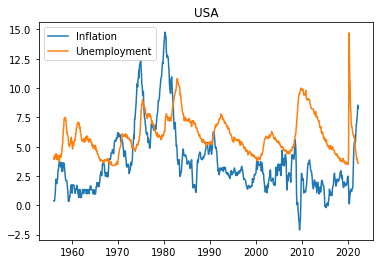

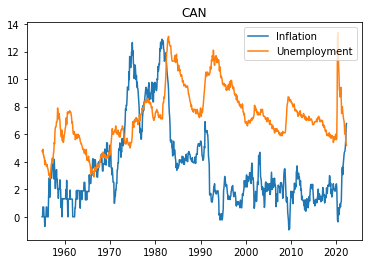

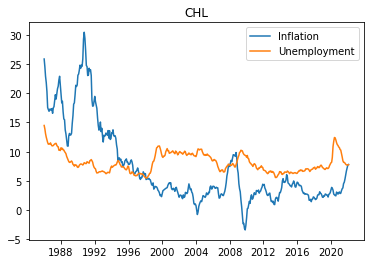

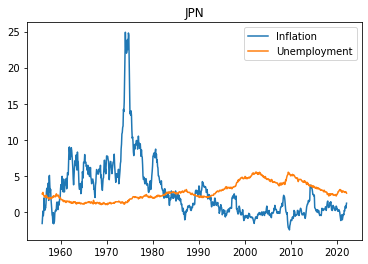

In [31]:
for count, location in enumerate(locations):
    infl, unemp = truncate_dates(inflation.loc[inflation["LOCATION"] == location], unemployment.loc[unemployment["LOCATION"] == location])
    infl_list.append(infl)
    unemp_list.append(unemp)
    plt.figure(count)
    plt.plot(infl["TIME"], infl["Value"])
    plt.plot(unemp["TIME"], unemp["Value"])
    plt.legend(["Inflation", "Unemployment"])
    plt.title(location)
    plt.show

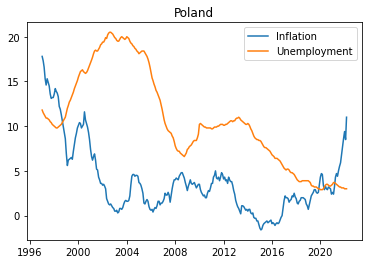

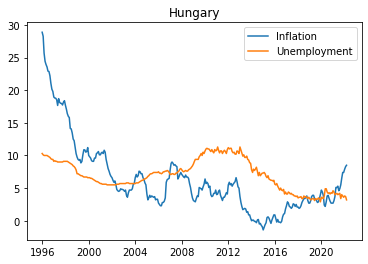

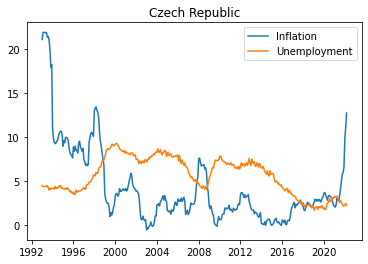

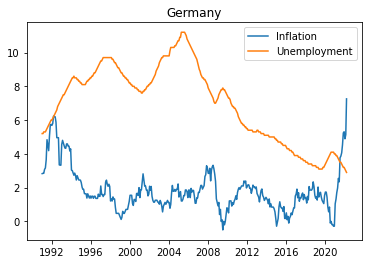

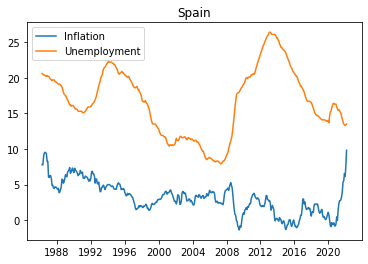

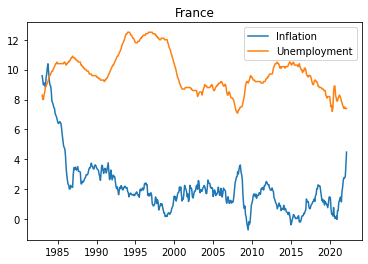

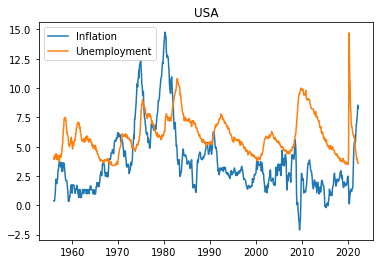

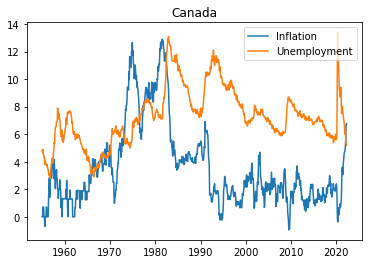

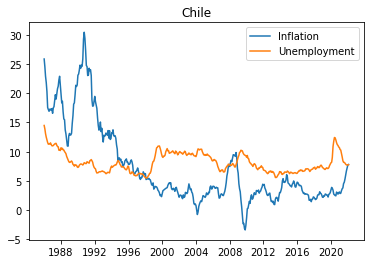

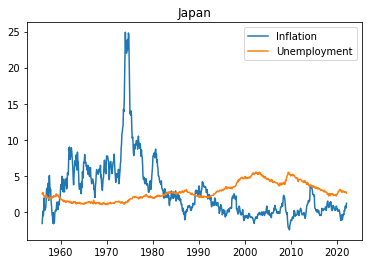

In [ ]:
#EASTERN EUROPE
#Poland
inflation_pol = inflation.loc[inflation["LOCATION"] == "POL"]
unemployment_pol = unemployment.loc[unemployment["LOCATION"] == "POL"]
[inflation_pol, unemployment_pol] = truncate_dates(inflation_pol, unemployment_pol)

#Hungary
inflation_hun = inflation.loc[inflation["LOCATION"] == "HUN"]
unemployment_hun = unemployment.loc[unemployment["LOCATION"] == "HUN"]
[inflation_hun, unemployment_hun] = truncate_dates(inflation_hun, unemployment_hun)

#Czech Republic
inflation_cze = inflation.loc[inflation["LOCATION"] == "CZE"]
unemployment_cze = unemployment.loc[unemployment["LOCATION"] == "CZE"]
[inflation_cze, unemployment_cze] = truncate_dates(inflation_cze, unemployment_cze)

#WWESTERN EUROPE
#Germany
inflation_deu = inflation.loc[inflation["LOCATION"] == "DEU"]
unemployment_deu = unemployment.loc[unemployment["LOCATION"] == "DEU"]
[inflation_deu, unemployment_deu] = truncate_dates(inflation_deu, unemployment_deu)

#Spain
inflation_esp = inflation.loc[inflation["LOCATION"] == "ESP"]
unemployment_esp = unemployment.loc[unemployment["LOCATION"] == "ESP"]
[inflation_esp, unemployment_esp] = truncate_dates(inflation_esp, unemployment_esp)

#France
inflation_fra = inflation.loc[inflation["LOCATION"] == "FRA"]
unemployment_fra = unemployment.loc[unemployment["LOCATION"] == "FRA"]
[inflation_fra, unemployment_fra] = truncate_dates(inflation_fra, unemployment_fra)

#NORTH AMERICA
#USA
inflation_usa = inflation.loc[inflation["LOCATION"] == "USA"]
unemployment_usa = unemployment.loc[unemployment["LOCATION"] == "USA"]
[inflation_usa, unemployment_usa] = truncate_dates(inflation_usa, unemployment_usa)

#Canada
inflation_can = inflation.loc[inflation["LOCATION"] == "CAN"]
unemployment_can = unemployment.loc[unemployment["LOCATION"] == "CAN"]
[inflation_can, unemployment_can] = truncate_dates(inflation_can, unemployment_can)

#SOUTH AMERICA
# Chile
inflation_chl = inflation.loc[inflation["LOCATION"] == "CHL"]
unemployment_chl = unemployment.loc[unemployment["LOCATION"] == "CHL"]
[inflation_chl, unemployment_chl] = truncate_dates(inflation_chl, unemployment_chl)

#ASIA
#Japan
inflation_jpn = inflation.loc[inflation["LOCATION"] == "JPN"]
unemployment_jpn = unemployment.loc[unemployment["LOCATION"] == "JPN"]
[inflation_jpn, unemployment_jpn] = truncate_dates(inflation_jpn, unemployment_jpn)

countries = [(inflation_pol, unemployment_pol, "Poland"), \
    (inflation_hun, unemployment_hun, "Hungary"), \
    (inflation_cze, unemployment_cze, "Czech Republic"), \
    (inflation_deu, unemployment_deu, "Germany"), \
    (inflation_esp, unemployment_esp, "Spain"), \
    (inflation_fra, unemployment_fra, "France"), \
    (inflation_usa, unemployment_usa, "USA"), \
    (inflation_can, unemployment_can, "Canada"), \
    (inflation_chl, unemployment_chl, "Chile"), \
    (inflation_jpn, unemployment_jpn, "Japan")]

for country in countries:
    plt.figure()
    plt.plot(country[0]["TIME"], country[0]["Value"])
    plt.plot(country[0]["TIME"], country[1]["Value"])
    plt.legend(["Inflation", "Unemployment"])
    plt.title(country[2])
    plt.show
